In [55]:
import numpy as np
import copy
import random

import pacman_gym as pg

from IPython.display import clear_output
import time
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import networkx as nx
from graphviz import Digraph
import pandas as pd


- Recherche des meilleurs hyper paramètres 

In [3]:
learning_rates = [0.1, 0.2, 0.3]
discount_factors = [0.8, 0.9, 1.0]
exploration_probs = [0.05, 0.1, 0.2]

'''
# Assurez-vous que la classe QLearning et l'environnement sont correctement définis et importés

for lr in learning_rates:
    for df in discount_factors:
        for ep in exploration_probs:
            # Créez une instance de l'agent Q-learning avec les hyperparamètres actuels
            q_learning_agent = QLearning(env, learning_rate=lr, discount_factor=df, exploration_prob=ep)
            
            # Entraînez l'agent pour un certain nombre d'épisodes
            q_learning_agent.train(num_episodes=10000)
            
            # Ajoutez des impressions pour suivre le progrès ou stockez les résultats selon vos besoins
            print(f"Training with lr={lr}, df={df}, ep={ep} completed.")
'''

'\n# Assurez-vous que la classe QLearning et l\'environnement sont correctement définis et importés\n\nfor lr in learning_rates:\n    for df in discount_factors:\n        for ep in exploration_probs:\n            # Créez une instance de l\'agent Q-learning avec les hyperparamètres actuels\n            q_learning_agent = QLearning(env, learning_rate=lr, discount_factor=df, exploration_prob=ep)\n            \n            # Entraînez l\'agent pour un certain nombre d\'épisodes\n            q_learning_agent.train(num_episodes=10000)\n            \n            # Ajoutez des impressions pour suivre le progrès ou stockez les résultats selon vos besoins\n            print(f"Training with lr={lr}, df={df}, ep={ep} completed.")\n'

# CLASSE QLEARNING

1 - Méthode simple

In [101]:
class QLearning:
    def __init__(self, environment, alpha=0.1, gamma=0.9, epsilon=0, stop_epsilon_at_episode=None):
        self.environment = environment
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.stop_epsilon_at_episode = stop_epsilon_at_episode
        self.episode_rewards = []
        self.q_table = {}

    def choose_action(self, state):

        possible_actions = self.environment.get_possible_actions()

        if random.random() < self.epsilon:
            return random.choice(possible_actions)

        q_values = {action: self.get_q_value(state, action) for action in possible_actions}
        best_actions = [action for action, q_value in q_values.items() if q_value == max(q_values.values())]

        return random.choice(best_actions)

    def get_q_value(self, state, action):
        if (state, action) not in self.q_table:
            return 0.0
        return self.q_table[(state, action)]

    def update_q_value(self, state, action, reward, next_state):
        best_next_action = max(self.environment.get_possible_actions(), key=lambda a: self.get_q_value(next_state, a))
        current_q = self.get_q_value(state, action)
        new_q = current_q + self.alpha * (reward + self.gamma * (self.get_q_value(next_state, best_next_action)-current_q))
        self.q_table[(state, action)] = new_q
    
    def plot_rewards_box(self):
        plt.figure(figsize=(12, 8))
        sns.boxplot(data=self.episode_rewards)
        sns.violinplot(data=self.episode_rewards, inner="quartile", color="lightgray")
        plt.title('Distribution des Récompenses par Groupe d\'Épisodes')
        plt.xlabel('Épisodes')
        plt.ylabel('Récompenses')

        plt.yticks(np.arange(-10, max(self.episode_rewards)+10, 10))

        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
   
    def plot_rewards_evolution(self, episode_window=10):
        mean_rewards = [np.mean(self.episode_rewards[i:i+episode_window]) for i in range(0, len(self.episode_rewards), episode_window)]
        episode_numbers = [i * episode_window + 1 for i in range(len(mean_rewards))]

        plt.figure(figsize=(12, 6))
        plt.plot(episode_numbers, mean_rewards, marker='o', linestyle='-')
        #plt.title(f'Moyenne des Récompenses par Tranche de {episode_window} Épisodes')
        plt.xlabel('Episodes')
        plt.ylabel('Rewards')
        #plt.ylabel(f'Moyenne Récompenses (Tranche de {episode_window} Épisodes)')
        plt.grid(True)
        plt.show()


    def train(self, num_episodes):

        for episode in range(num_episodes):

            if self.stop_epsilon_at_episode is not None and episode >= self.stop_epsilon_at_episode:
                self.epsilon = 0
                
            self.environment.reset()
            state = self.environment.get_state()
            total_reward = 0

            while not self.environment.is_game_over():
                action = self.choose_action(state)

                self.environment.move_pacman(action)
                reward = self.environment.get_reward()
                total_reward += reward
                next_state = self.environment.get_state()
                self.update_q_value(state, action, reward, next_state)
                state = next_state
                
                '''
                clear_output(wait=True)
                self.environment.display()
                time.sleep(0.5)
                '''

            self.episode_rewards.append(total_reward)
            
            print(f"Episode {episode + 1}/{num_episodes}, Total Reward: {total_reward}")



In [102]:
env = pg.PacmanEnvironment(rows=4, cols=5, num_ghosts=1, num_pac_dots=1, num_map=1, move_ghost=False)

env.display()



. . . . P 
. . B B B 
G . B . . 
. . D . . 
Récompense : 0




In [103]:
q_learning_agent = QLearning(environment=env, alpha=0.1, gamma=0.9)
q_learning_agent.train(num_episodes=30)

Episode 1/30, Total Reward: -13
Episode 2/30, Total Reward: -11
Episode 3/30, Total Reward: 10
Episode 4/30, Total Reward: 9
Episode 5/30, Total Reward: 10
Episode 6/30, Total Reward: 10
Episode 7/30, Total Reward: 10
Episode 8/30, Total Reward: 10
Episode 9/30, Total Reward: 10
Episode 10/30, Total Reward: 10
Episode 11/30, Total Reward: 10
Episode 12/30, Total Reward: 10
Episode 13/30, Total Reward: 10
Episode 14/30, Total Reward: 10
Episode 15/30, Total Reward: 10
Episode 16/30, Total Reward: 10
Episode 17/30, Total Reward: 10
Episode 18/30, Total Reward: 10
Episode 19/30, Total Reward: 10
Episode 20/30, Total Reward: 10
Episode 21/30, Total Reward: 10
Episode 22/30, Total Reward: 10
Episode 23/30, Total Reward: 10
Episode 24/30, Total Reward: 10
Episode 25/30, Total Reward: 10
Episode 26/30, Total Reward: 10
Episode 27/30, Total Reward: 10
Episode 28/30, Total Reward: 10
Episode 29/30, Total Reward: 10
Episode 30/30, Total Reward: 10


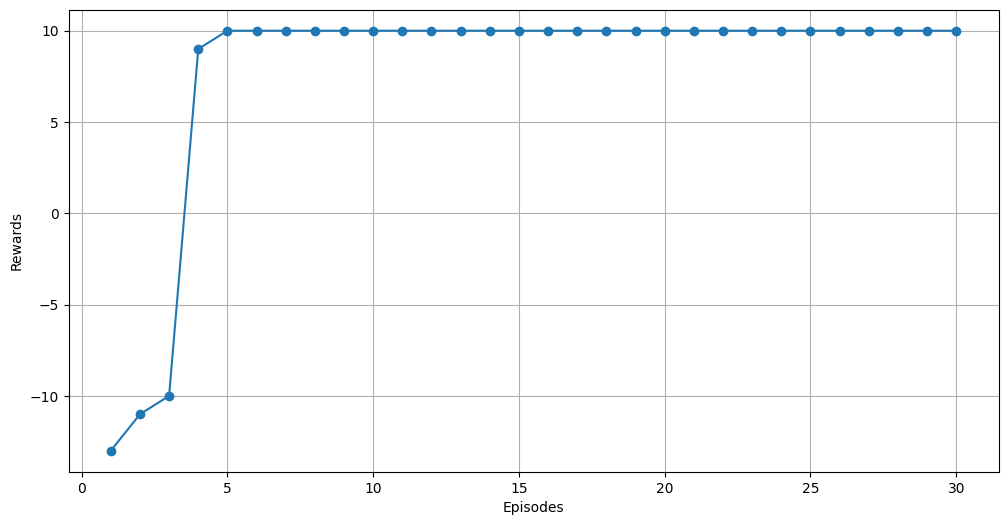

In [67]:
q_learning_agent.plot_rewards_evolution(episode_window=1)

In [76]:
env2 = pg.PacmanEnvironment(rows=10, cols=20, num_ghosts=15, num_pac_dots=1, block_percentage=0.25)

env2.display()



. . . . G B B . . . . B . B . . . . G . 
. . . . . . . . B G B . . . . . B B B B 
. . . . . . . . . B . . . . B . . B . . 
B . . B B . . . . . . . . . B B G . . B 
. B . . . . B D . . . . G . . . B . . . 
B B G . . . . . . B . B G . . . B . . . 
. . . G . . . G . B . . . B . B . . . . 
B . . B . G . B B . . B G . B B . . . . 
B . B . . B . . . G . . . . . B G . . B 
. B . B B . . B . B B B B G . . . P G . 
Récompense : 0




In [106]:
q2_learning_agent = QLearning(environment=env2, alpha=0.1, gamma=0.9,  stop_epsilon_at_episode=30)
q2_learning_agent.train(num_episodes=40)

Episode 1/40, Total Reward: -10
Episode 2/40, Total Reward: -10
Episode 3/40, Total Reward: -10
Episode 4/40, Total Reward: -12
Episode 5/40, Total Reward: -10
Episode 6/40, Total Reward: -12
Episode 7/40, Total Reward: -11
Episode 8/40, Total Reward: -12
Episode 9/40, Total Reward: -18
Episode 10/40, Total Reward: -12
Episode 11/40, Total Reward: -12
Episode 12/40, Total Reward: -16
Episode 13/40, Total Reward: -11
Episode 14/40, Total Reward: -11
Episode 15/40, Total Reward: -10
Episode 16/40, Total Reward: -20
Episode 17/40, Total Reward: -12
Episode 18/40, Total Reward: -20
Episode 19/40, Total Reward: -17
Episode 20/40, Total Reward: -15
Episode 21/40, Total Reward: -11
Episode 22/40, Total Reward: 10
Episode 23/40, Total Reward: 8
Episode 24/40, Total Reward: 10
Episode 25/40, Total Reward: 8
Episode 26/40, Total Reward: 10
Episode 27/40, Total Reward: 10
Episode 28/40, Total Reward: 10
Episode 29/40, Total Reward: 10
Episode 30/40, Total Reward: 10
Episode 31/40, Total Reward: 1

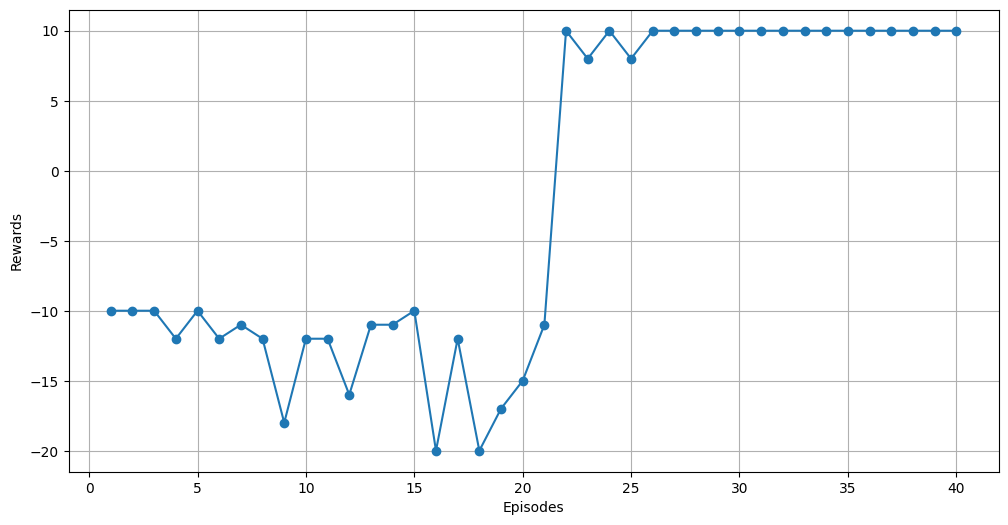

In [107]:
q2_learning_agent.plot_rewards_evolution(episode_window=1)

- With random

In [108]:
q_learning_agent = QLearning(environment=env, alpha=0.1, gamma=0.9, epsilon=0.1, stop_epsilon_at_episode=100)
q_learning_agent.train(num_episodes=40)

Episode 1/40, Total Reward: -15
Episode 2/40, Total Reward: -11
Episode 3/40, Total Reward: 7
Episode 4/40, Total Reward: 9
Episode 5/40, Total Reward: 6
Episode 6/40, Total Reward: 10
Episode 7/40, Total Reward: 10
Episode 8/40, Total Reward: 9
Episode 9/40, Total Reward: 9
Episode 10/40, Total Reward: 10
Episode 11/40, Total Reward: 10
Episode 12/40, Total Reward: 10
Episode 13/40, Total Reward: 10
Episode 14/40, Total Reward: 10
Episode 15/40, Total Reward: 10
Episode 16/40, Total Reward: 10
Episode 17/40, Total Reward: 10
Episode 18/40, Total Reward: 9
Episode 19/40, Total Reward: 10
Episode 20/40, Total Reward: 10
Episode 21/40, Total Reward: 10
Episode 22/40, Total Reward: 10
Episode 23/40, Total Reward: 10
Episode 24/40, Total Reward: 10
Episode 25/40, Total Reward: 10
Episode 26/40, Total Reward: 10
Episode 27/40, Total Reward: 10
Episode 28/40, Total Reward: 10
Episode 29/40, Total Reward: 10
Episode 30/40, Total Reward: 10
Episode 31/40, Total Reward: 10
Episode 32/40, Total 

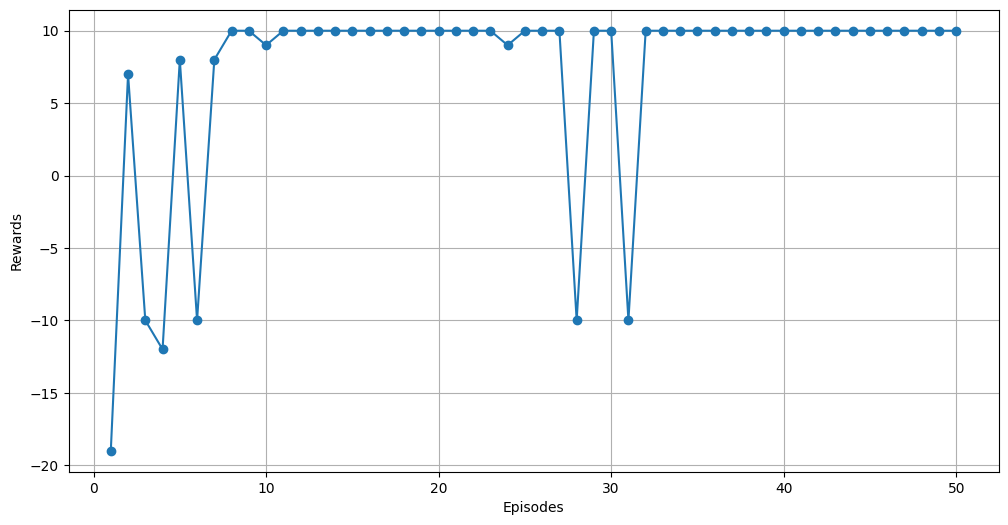

In [87]:
q_learning_agent.plot_rewards_evolution(episode_window=1)

In [116]:
q2_learning_agent = QLearning(environment=env2, alpha=0.1, gamma=0.9, epsilon=0.1,  stop_epsilon_at_episode=190)
q2_learning_agent.train(num_episodes=200)

Episode 1/200, Total Reward: -10
Episode 2/200, Total Reward: -10
Episode 3/200, Total Reward: -14
Episode 4/200, Total Reward: -14
Episode 5/200, Total Reward: -13
Episode 6/200, Total Reward: -12
Episode 7/200, Total Reward: -10
Episode 8/200, Total Reward: -10
Episode 9/200, Total Reward: -10
Episode 10/200, Total Reward: -10
Episode 11/200, Total Reward: -11
Episode 12/200, Total Reward: -10
Episode 13/200, Total Reward: -12
Episode 14/200, Total Reward: -10
Episode 15/200, Total Reward: -10
Episode 16/200, Total Reward: -13
Episode 17/200, Total Reward: -11
Episode 18/200, Total Reward: -10
Episode 19/200, Total Reward: -10


Episode 20/200, Total Reward: -17
Episode 21/200, Total Reward: -10
Episode 22/200, Total Reward: -10
Episode 23/200, Total Reward: -12
Episode 24/200, Total Reward: -12
Episode 25/200, Total Reward: -13
Episode 26/200, Total Reward: -11
Episode 27/200, Total Reward: -11
Episode 28/200, Total Reward: -19
Episode 29/200, Total Reward: -13
Episode 30/200, Total Reward: -17
Episode 31/200, Total Reward: -11
Episode 32/200, Total Reward: -10
Episode 33/200, Total Reward: -10
Episode 34/200, Total Reward: -10
Episode 35/200, Total Reward: -11
Episode 36/200, Total Reward: -10
Episode 37/200, Total Reward: -14
Episode 38/200, Total Reward: -10
Episode 39/200, Total Reward: -11
Episode 40/200, Total Reward: -10
Episode 41/200, Total Reward: -11
Episode 42/200, Total Reward: -14
Episode 43/200, Total Reward: -11
Episode 44/200, Total Reward: -10
Episode 45/200, Total Reward: -10
Episode 46/200, Total Reward: -22
Episode 47/200, Total Reward: -10
Episode 48/200, Total Reward: -12
Episode 49/200

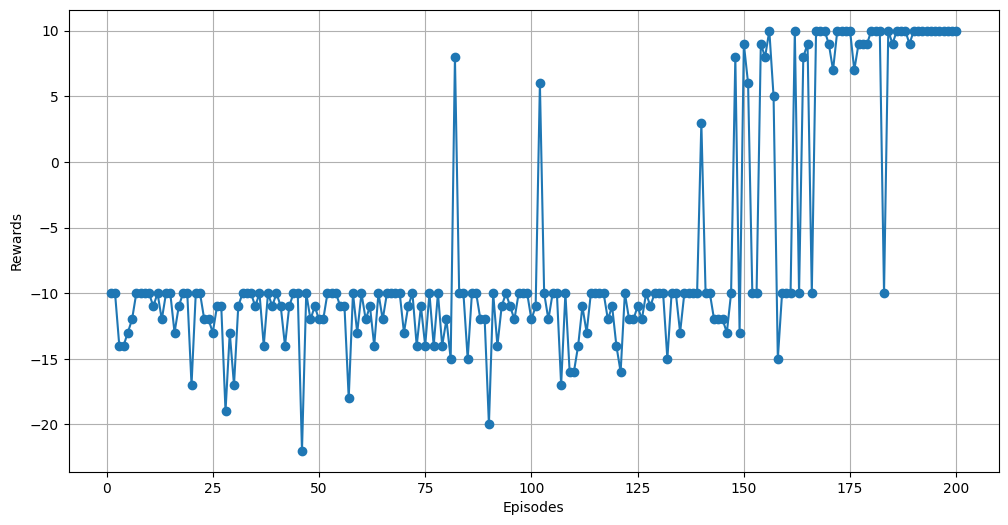

In [117]:
q2_learning_agent.plot_rewards_evolution(episode_window=1)